<a href="https://colab.research.google.com/github/ruthvik0823/NLP/blob/main/NLP_Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install PyPDF2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 3.7 MB/s eta 0:00:00


In [ ]:
from nltk.probability import FreqDist, ConditionalFreqDist
import PyPDF2
import nltk
import numpy as np
import pandas as pd
import re
import random
from nltk import FreqDist
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.corpus import brown
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')
from nltk.util import bigrams
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [ ]:
# pdf_path = '/content/gullivers-travels-1-12.pdf'
org_pdf_path = '/content/gullivers-travels.pdf'
def extract_text_from_pdf(pdf_path):
    text = ""
    with open(pdf_path, 'rb') as pdf_file:
        pdf_reader = PyPDF2.PdfReader(pdf_file)
        for page in range(len(pdf_reader.pages)):
            text += pdf_reader.pages[page].extract_text()
    return text


In [ ]:
pdf_text = extract_text_from_pdf(org_pdf_path)

In [ ]:
# print(pdf_text[0:20000])

# **Text Processing and Frequency Distribution**

In [ ]:
copy_pdf_text = pdf_text

In [ ]:
cnt = pdf_text.count(" Free eBooks at Planet eBook")
cnt

191

In [ ]:
copy_pdf_text = re.sub(r" Free eBooks at Planet eBook", "", copy_pdf_text)
copy_pdf_text = re.sub(r'[^\x00-\x7F]+', '', copy_pdf_text)
copy_pdf_text = re.sub(r'Gullivers Travels (\d*)?([^0-9\x00-\x7F])?', '', copy_pdf_text)
copy_pdf_text = re.sub(r'\.com\s*', '', copy_pdf_text)
copy_pdf_text = re.sub(r'RICHARD SYMPSON.', '', copy_pdf_text)
copy_pdf_text = re.sub(r'Chapter [IVXLCDM]+', '', copy_pdf_text)

In [ ]:
# print(pdf_text[0: 2000])
# print(copy_pdf_text[0: 10000])

In [ ]:
lines_to_remove = 6
lines = copy_pdf_text.split('\n')
lines = lines[lines_to_remove:]
copy_pdf_text = '\n'.join(lines)

In [ ]:
copy_pdf_text = re.sub(r'(?<!-)\n', '', copy_pdf_text)
copy_pdf_text = re.sub(r'-', '', copy_pdf_text)
copy_pdf_text = re.sub(r'\n', ' ', copy_pdf_text)
copy_pdf_text = re.sub(r'\.(?=\w)', '. ', copy_pdf_text)
# copy_pdf_text = re.sub(r'([!-/:-@[-`{-~])((?=\w)|(?<=\w))|((?<=\w))([!-/:-@[-`{-~])', r'\1 \2', copy_pdf_text)
copy_pdf_text = re.sub(r'^\((.)|(.)\)$', r'( \1\2 )', copy_pdf_text)

In [ ]:
print(copy_pdf_text)

As given in the original edition. The author of these Travels, Mr. Lemuel Gulliver, is my an  cient and intimate friend; there is likewise some relation between us on the mothers side. About three years ago, Mr. Gulliver growing weary of the concourse of curious people coming to him at his house in Redriff, made a small pur  chase of land, with a convenient house, near Newark, in Nottinghamshire, his native country; where he now lives retired, yet in good esteem among his neighbours. Although Mr. Gulliver was born in Nottinghamshire, where his father dwelt, yet I have heard him say his family came from Oxfordshire; to confirm which, I have observed in the churchyard at Banbury in that county, several tombs and monuments of the Gullivers. Before he quitted Redriff, he left the custody of the fol  lowing papers in my hands, with the liberty to dispose of them as I should think fit. I have carefully perused them three times. The style is very plain and simple; and the only fault I find is

In [ ]:
tokens = word_tokenize(copy_pdf_text)
# tokens1 = [word for word in tokens if word.isalpha()] #use this tokens1 if you need to eliminate alphanumeric character also
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
filtered_text = ' '.join(filtered_tokens)

In [ ]:
print(tokens)

['As', 'given', 'in', 'the', 'original', 'edition', '.', 'The', 'author', 'of', 'these', 'Travels', ',', 'Mr.', 'Lemuel', 'Gulliver', ',', 'is', 'my', 'an', 'cient', 'and', 'intimate', 'friend', ';', 'there', 'is', 'likewise', 'some', 'relation', 'between', 'us', 'on', 'the', 'mothers', 'side', '.', 'About', 'three', 'years', 'ago', ',', 'Mr.', 'Gulliver', 'growing', 'weary', 'of', 'the', 'concourse', 'of', 'curious', 'people', 'coming', 'to', 'him', 'at', 'his', 'house', 'in', 'Redriff', ',', 'made', 'a', 'small', 'pur', 'chase', 'of', 'land', ',', 'with', 'a', 'convenient', 'house', ',', 'near', 'Newark', ',', 'in', 'Nottinghamshire', ',', 'his', 'native', 'country', ';', 'where', 'he', 'now', 'lives', 'retired', ',', 'yet', 'in', 'good', 'esteem', 'among', 'his', 'neighbours', '.', 'Although', 'Mr.', 'Gulliver', 'was', 'born', 'in', 'Nottinghamshire', ',', 'where', 'his', 'father', 'dwelt', ',', 'yet', 'I', 'have', 'heard', 'him', 'say', 'his', 'family', 'came', 'from', 'Oxfordshire

In [ ]:
len(set(filtered_tokens))
len(filtered_tokens)

64415

In [ ]:
fdist = FreqDist(filtered_tokens)
df1 = pd.DataFrame(fdist.items(), columns=['Token', 'Frequency']).sort_values(by='Frequency', ascending=False)
df1 = df1.reset_index(drop = True)

In [ ]:
df1.head(10)

Token  Frequency
0      ,       9920
1      .       2679
2      ;       1551
3  could        391
4   upon        374
5  would        370
6      :        317
7  great        289
8    one        259
9    two        250

In [ ]:
df1.drop(index=df1.index[:3], inplace = True)

In [ ]:
(df1['Frequency'] == 1).sum()

4717

In [ ]:
# freq_matrix = [[fdist.freq(token) for token in fdist.keys()]]
# freq_matrix

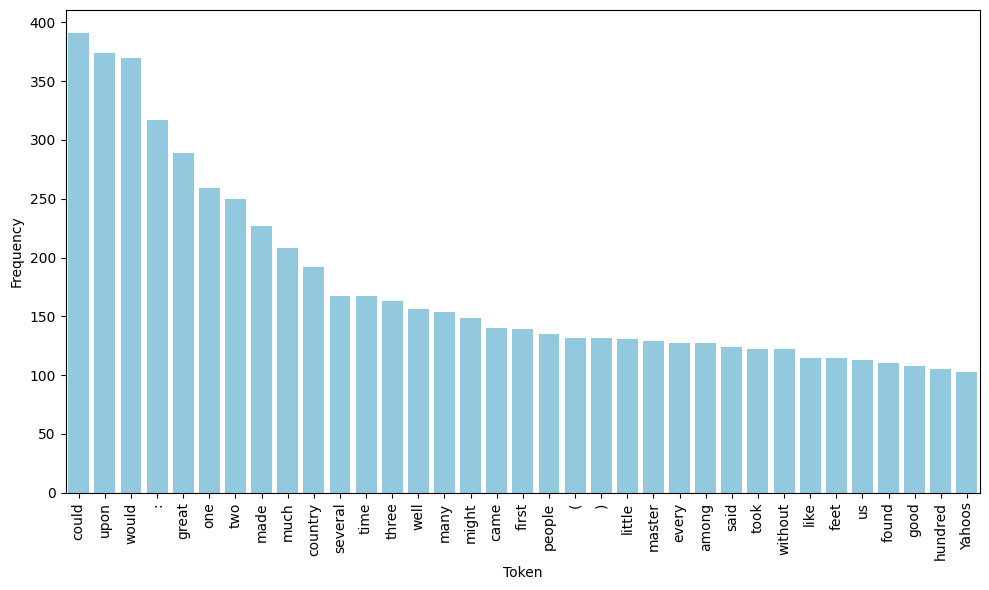

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df1.head(35), x='Token', y='Frequency', color='skyblue')
plt.xticks(rotation=90)
plt.tight_layout()


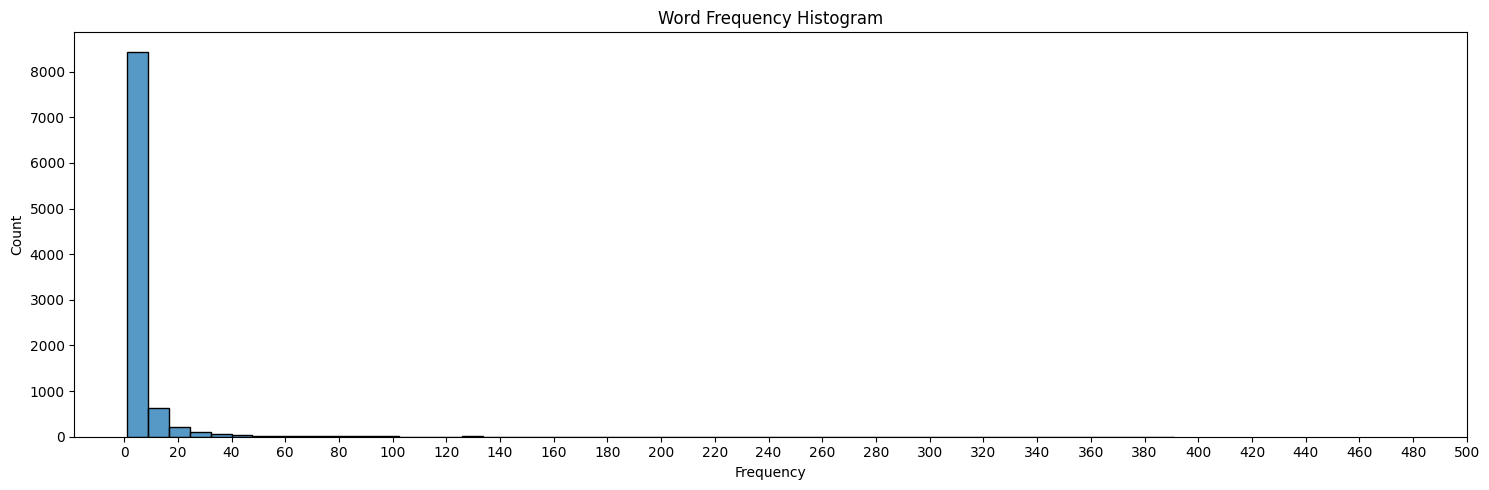

In [ ]:
plt.figure(figsize=(15, 5))
sns.histplot(data=df1, x='Frequency', bins=50, kde=False)
plt.xticks(list(range(0, 501, 20)))
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.title('Word Frequency Histogram')
plt.tight_layout()

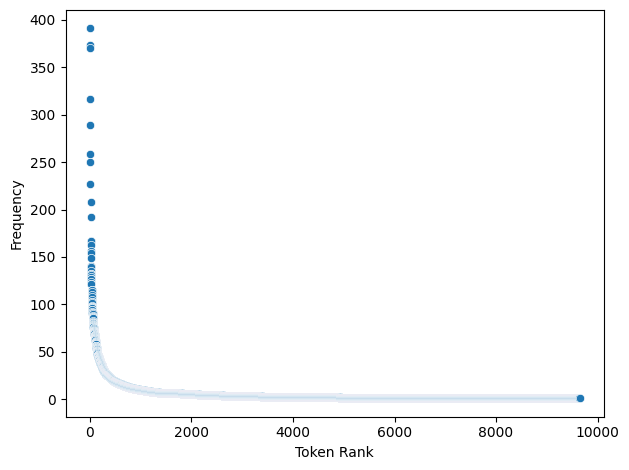

In [ ]:
sns.scatterplot(data=df1, x=df1.index, y='Frequency')
plt.xlabel('Token Rank')
plt.ylabel('Frequency')
plt.tight_layout()

(-0.5, 999.5, 499.5, -0.5)

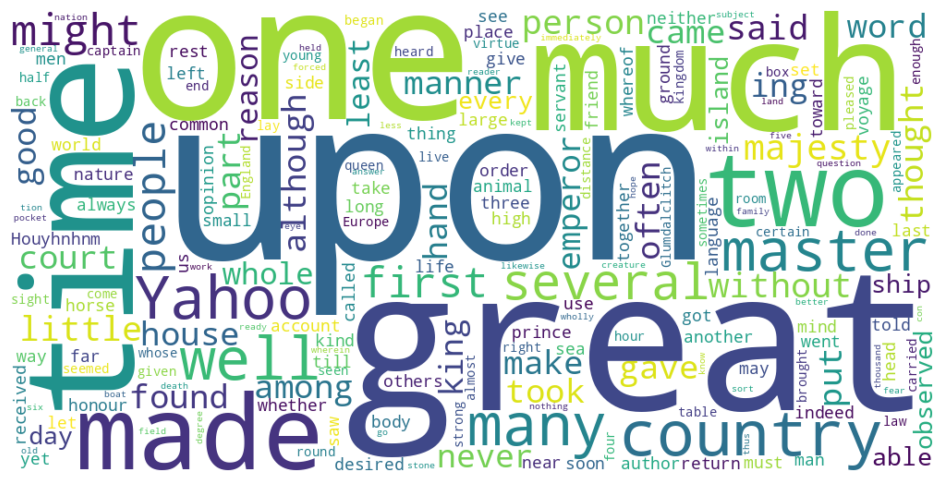

In [ ]:
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(filtered_text)
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# **POS TAGGING**

In [ ]:
categories = brown.categories()
combined_corpus = nltk.corpus.PlaintextCorpusReader('', [f'{cat}/*.txt' for cat in categories])
results = nltk.pos_tag(tokens)
tag_distribution1 = FreqDist(tag for tag1, tag in results)
df2 = pd.DataFrame(tag_distribution1.items(), columns=['PoS Tag', 'Frequency'])

In [ ]:
df2.head(10)

PoS Tag  Frequency
0      IN      15063
1     VBN       2761
2      DT      11218
3      JJ       7280
4      NN      15919
5       .       2749
6     NNP       1261
7       ,       9920
8     VBZ        858
9    PRP$       3683

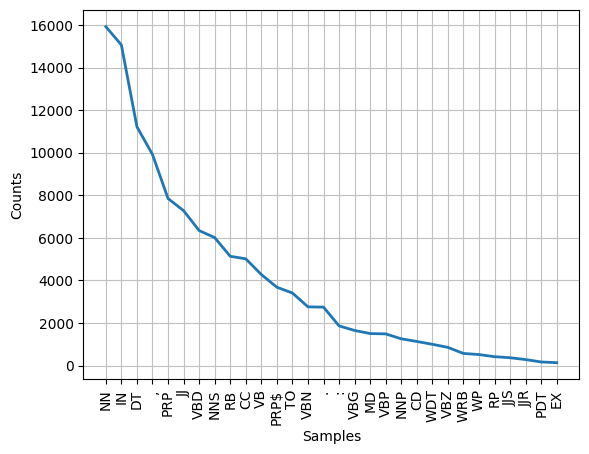

<Figure size 640x480 with 0 Axes>

In [ ]:
tag_distribution1.plot(30, cumulative=False)
plt.xlabel("PoS Tags")
plt.ylabel("Frequency")
plt.title("PoS Tag Distribution (Brown Corpus)")
plt.clf()

Text(0.5, 1.0, "POS Tag Frequency in 'Gulliver's Travels'")

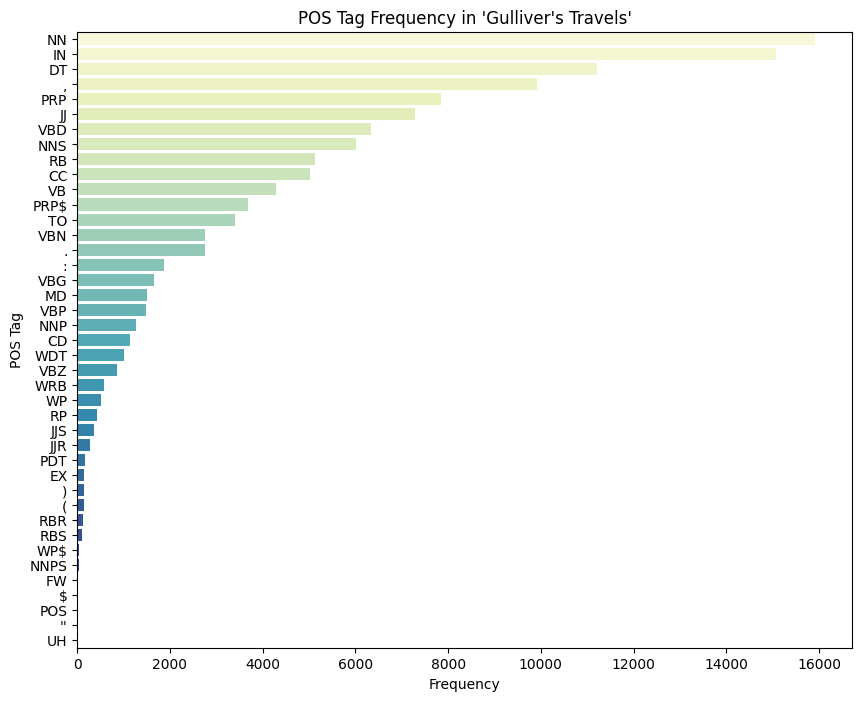

In [ ]:
df2 = df2.sort_values(by="Frequency", ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x="Frequency", y="PoS Tag", data=df2, palette="YlGnBu")
plt.xlabel("Frequency")
plt.ylabel("POS Tag")
plt.title("POS Tag Frequency in 'Gulliver's Travels'")

# **Bigrams**

In [ ]:
sample_text = pdf_text

In [ ]:
chapter_pattern = r"Chapter [IVXLCDM]+"
chapters = re.split(chapter_pattern, pdf_text)

In [ ]:
#Getting the largest chapters of all the chapters present in the novel
largest_chapter = ""
largest_chapter_length = 0

for chapter in chapters:
    chapter_length = len(chapter)
    if chapter_length > largest_chapter_length:
        largest_chapter = chapter
        largest_chapter_length = chapter_length


In [ ]:
# Tokenize the text into words
sample_tokens = nltk.word_tokenize(largest_chapter)

In [ ]:
# Calculate bigrams in the sample text
sample_bigrams = list(bigrams(sample_tokens))

# Count the occurrences of each bigram
bigram_counts = Counter(sample_bigrams)

# Count the occurrences of each unigram
unigram_counts = Counter(sample_tokens)

# Calculate the probability of each bigram
bigram_probabilities = {bigram: bigram_counts[bigram] / unigram_counts[bigram[0]] for bigram in bigram_counts}

df = pd.DataFrame(bigram_probabilities.items(), columns=['Bigram', 'Probability'])
df

Bigram  Probability
0              (A, great)     0.500000
1          (great, storm)     0.125000
2      (storm, described)     0.200000
3          (described, ;)     1.000000
4                (;, the)     0.080000
...                   ...          ...
4122   (without, justice)     0.333333
4123         (justice, ,)     0.500000
4124     (,, accused.11)     0.002198
4125  (accused.11, Free)     1.000000
4126  (Planet, eBook.com)     0.125000

[4127 rows x 2 columns]

In [ ]:
chapters.remove(largest_chapter)
selected_chapter = random.choice(chapters)

# **Shanon Game**

In [ ]:
def fill_in_blanks(chapter_tokens, blank_positions, bigram_probabilities):
    filled_text = list(chapter_tokens)  # Create a copy of the chapter tokens
    for position in blank_positions:
        if position < 1 or position >= len(chapter_tokens):
            continue  # Skip positions at the beginning or end of the chapter
        # Get the previous word
        previous_word = chapter_tokens[position - 1]
        # Find possible next words based on bi-gram probabilities
        possible_next_words = [word for word in bigram_probabilities if word[0] == previous_word]
        if possible_next_words:
            # Select the next word with the highest probability
            next_word = max(possible_next_words, key=lambda word: bigram_probabilities[word])
            filled_text[position] = next_word[1]  # Use the second word in the bi-gram as the replacement
    return filled_text

In [ ]:
# Sample text (chapter you want to play the Shannon game with)
chapter_text = selected_chapter
# Tokenize the chapter text (assuming it's already tokenized)
chapter_tokens = nltk.word_tokenize(chapter_text)
# chapter_tokens = [word for word in chapter_tokens if word.isalpha()]

# Blank positions in the chapter text (assuming they are pre-defined)
blank_positions = [5, 8, 12, 15]  # Replace with the actual positions of blanks


# Replace the tokens at blank positions with '***'
for position in blank_positions:
    if position >= 0 and position < len(chapter_tokens):
        chapter_tokens[position] = '***'

copy_chapter_tokens = " ".join(chapter_tokens)
print(copy_chapter_tokens)

# Use the fill_in_blanks function to fill in the blank positions in the chapter
filled_text = fill_in_blanks(chapter_tokens, blank_positions, bigram_probabilities)

# Display the filled-in text
final_predicted_text = " ".join(filled_text)

The author ’ s dangerous *** . He *** at New Holland *** hoping to *** there . Is wounded with an arrow by one of the natives . Is seized and carried by force into a Portuguese ship . The great civilities of the captain . The author arrives at England . I began this desperate voyage on February 15 , 1714-15 , at nine o ’ clock in the morning . The wind was very favour - able ; however , I made use at first only of my paddles ; but considering I should soon be weary , and that the wind might chop about , I ventured to set up my little sail ; and thus , with the help of the tide , I went at the rate of a league and a half an hour , as near as I could guess . My master and his friends continued on the shore till I was almost out of sight ; and I often heard the sorrel nag ( who always loved me ) crying out , ‘ Hnuy illa nyha , majah Yahoo ; ’ ‘ Take care of thyself , gentle Yahoo. ’ My design was , if possible , to discover some small is - land uninhabited , yet sufficient , by my labour 

In [ ]:
print(final_predicted_text)

The author ’ s dangerous . . He then at New Holland *** hoping to the there . Is wounded with an arrow by one of the natives . Is seized and carried by force into a Portuguese ship . The great civilities of the captain . The author arrives at England . I began this desperate voyage on February 15 , 1714-15 , at nine o ’ clock in the morning . The wind was very favour - able ; however , I made use at first only of my paddles ; but considering I should soon be weary , and that the wind might chop about , I ventured to set up my little sail ; and thus , with the help of the tide , I went at the rate of a league and a half an hour , as near as I could guess . My master and his friends continued on the shore till I was almost out of sight ; and I often heard the sorrel nag ( who always loved me ) crying out , ‘ Hnuy illa nyha , majah Yahoo ; ’ ‘ Take care of thyself , gentle Yahoo. ’ My design was , if possible , to discover some small is - land uninhabited , yet sufficient , by my labour ,

In [ ]:
# Sample text (original chapter you want to compare with)
original_chapter_text = selected_chapter
# Tokenize the original chapter text (assuming it's already tokenized)
original_tokens = nltk.word_tokenize(selected_chapter)

# Calculate the accuracy of the filled text
def calculate_accuracy(original_tokens, filled_text, blank_positions):
    if len(original_tokens) != len(filled_text):
        raise ValueError("Original and filled token lists must have the same length.")

    correct_predictions = 0
    total_predictions = 0

    for position in blank_positions:
        if position < 0 or position >= len(original_tokens):
            continue  # Skip positions outside the valid token range

        original_word = original_tokens[position]
        filled_word = filled_text[position]

        total_predictions += 1
        if original_word == filled_word:
            correct_predictions += 1

    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy

# Calculate accuracy
accuracy = calculate_accuracy(original_tokens, filled_text, blank_positions)

# Display the accuracy
print(f"Accuracy: {accuracy:.2f}%")


Accuracy: 0.00%


# **Round 2**

### **i)USING NLTK**

In [ ]:
from nltk import ne_chunk, pos_tag, word_tokenize
from nltk.tree import Tree
nltk.download('maxent_ne_chunker')
nltk.download('words')

In [ ]:
def entities(tree):
    labels = []
    if isinstance(tree, Tree):
        if tree.label() in ['ORGANIZATION', 'PERSON', 'GPE', 'LOCATION', 'DATE', 'TIME', 'MONEY', 'PERCENT', 'FACILITY', 'GSP', 'O']:
            entity_text = " ".join([child[0] if isinstance(child, tuple) else child for child in tree.leaves()])
            labels.append((entity_text, tree.label()))
        for child in tree:
            labels.extend(entities(child))
    return labels

tree = ne_chunk(results)
entities_with_labels = entities(tree)
for entity, label in entities_with_labels:
    print(f"{entity}: {label}")

In [ ]:
entity_counts = {}
for _, entity_type in entities_with_labels:
    entity_counts[entity_type] = entity_counts.get(entity_type, 0) + 1

Text(0.5, 1.0, 'Bar Graph: Distribution of Entity Types')

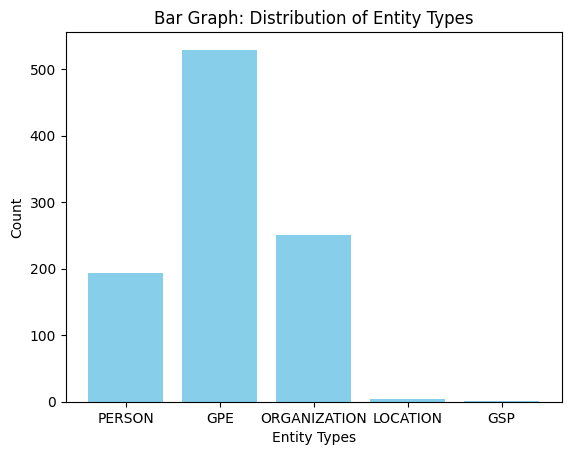

In [ ]:
fig, ax1 = plt.subplots()
ax1.bar(entity_counts.keys(), entity_counts.values(), color='skyblue')
ax1.set_xlabel('Entity Types')
ax1.set_ylabel('Count')
ax1.set_title('Bar Graph: Distribution of Entity Types')

In [ ]:
plt.savefig('nltk_bar.png')

<Figure size 640x480 with 0 Axes>

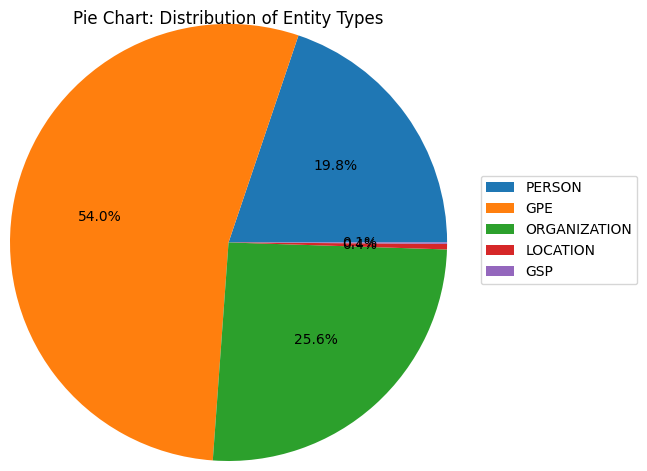

In [ ]:
fig, ax = plt.subplots()
ax.pie(entity_counts.values(), autopct='%1.1f%%', startangle=0, radius = 1.3)
ax.set_title('Pie Chart: Distribution of Entity Types')
plt.tight_layout()
# plt.subplots_adjust(left=0.1, right=0.9, top=1.3, bottom=0.1)
plt.legend(labels=entity_counts.keys(), loc = (1.1, .4))
plt.show()

### **ii) USING SPACY**

In [ ]:
import spacy

Iteration 1: F1 Score for Types: 0.888888888888889



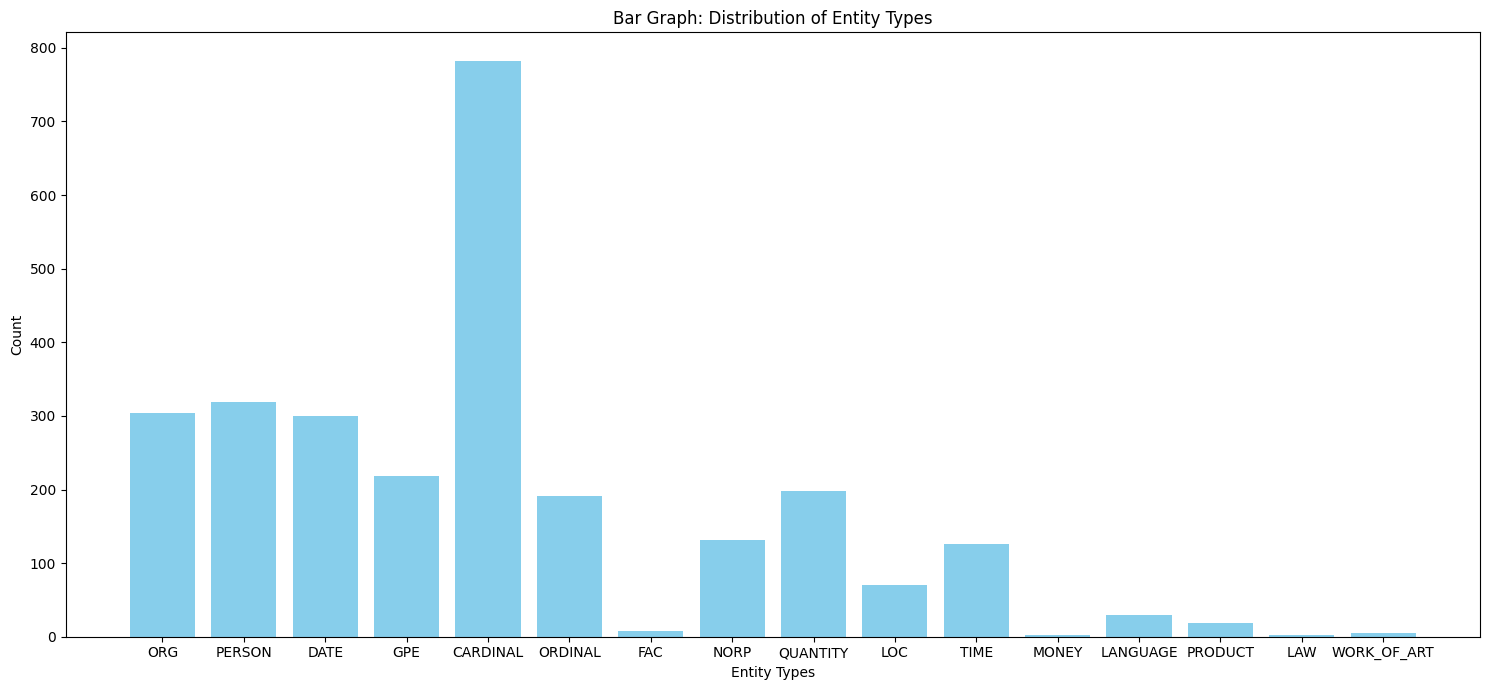

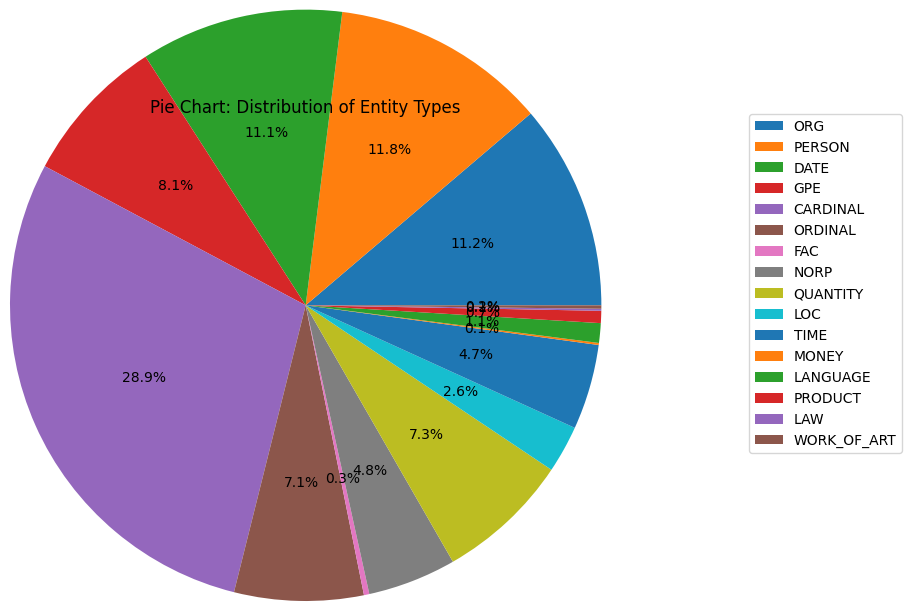


Iteration 2: F1 Score for Types: 0.888888888888889



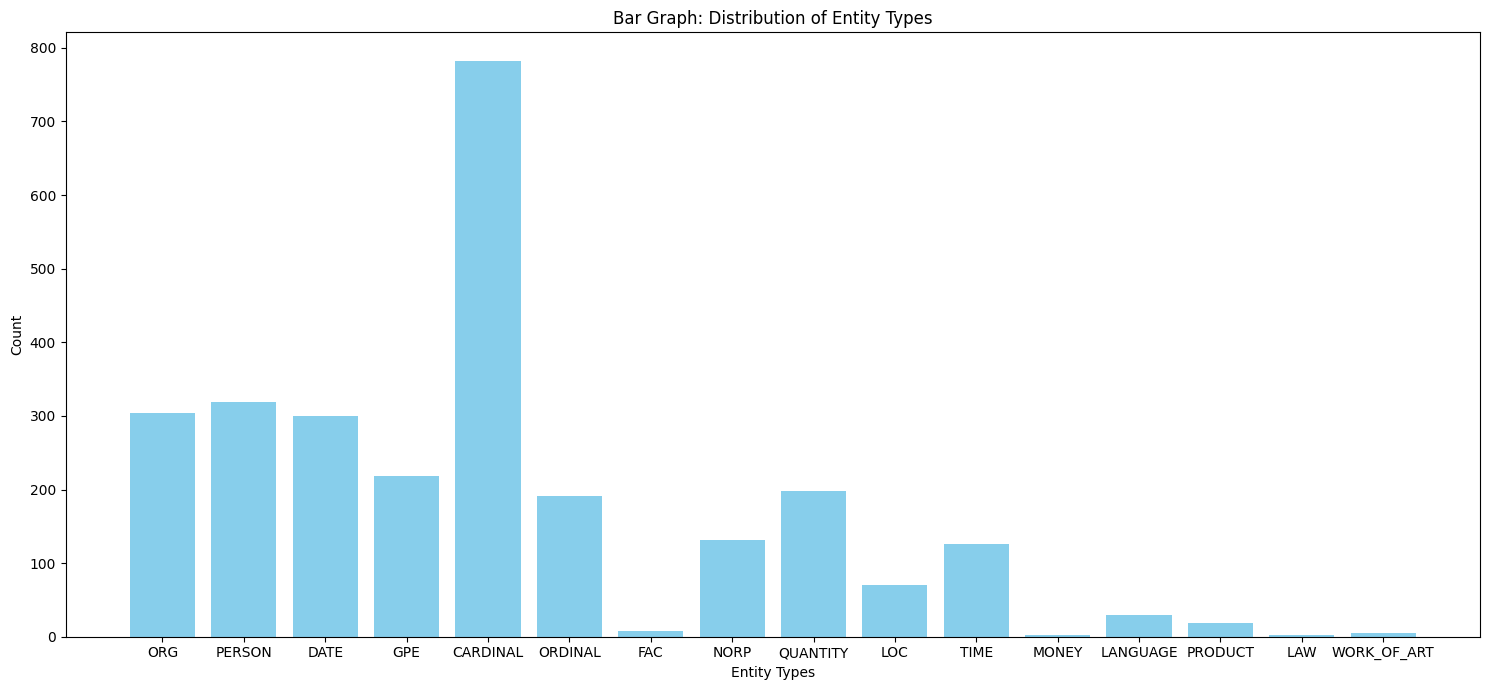

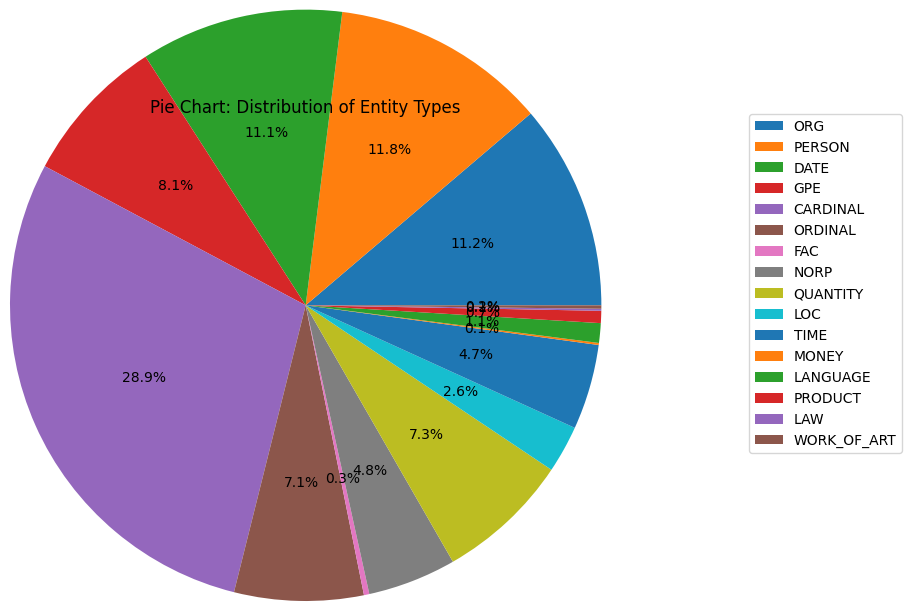


Iteration 3: F1 Score for Types: 0.888888888888889



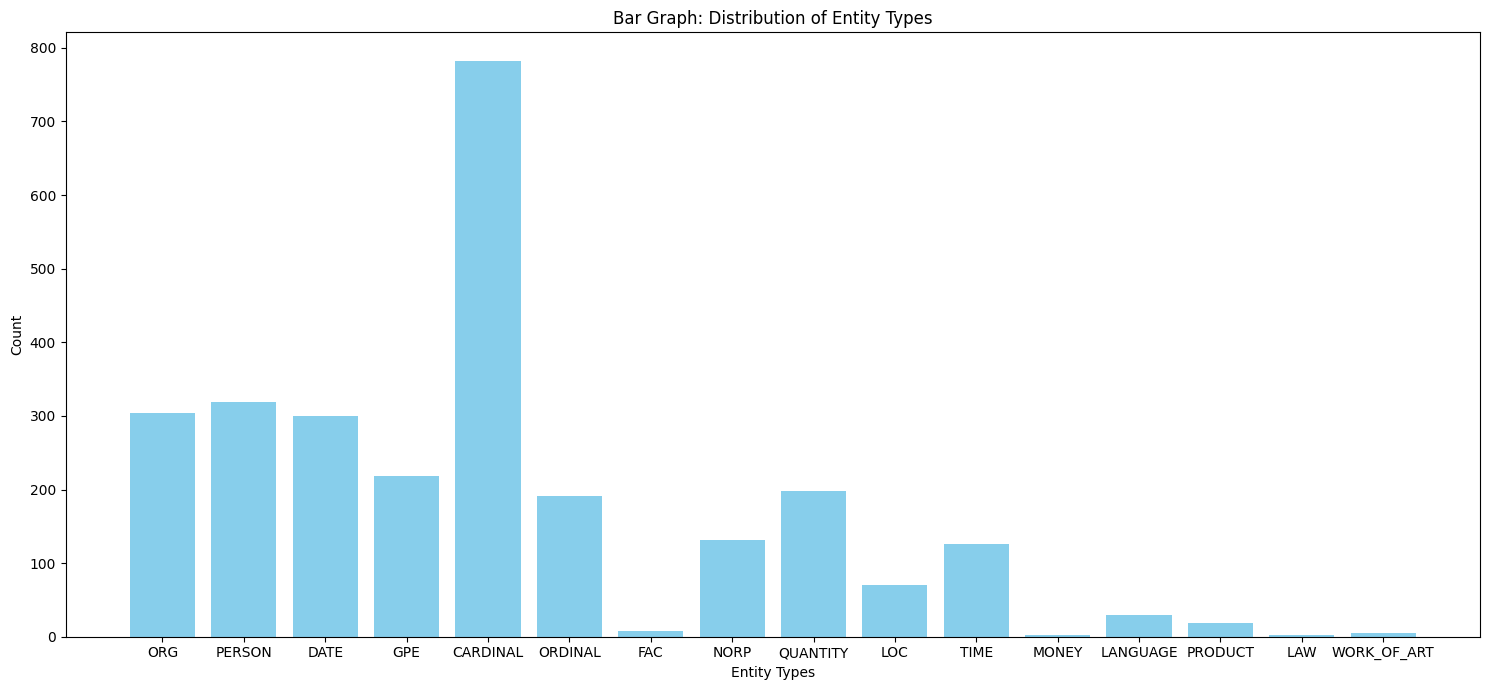

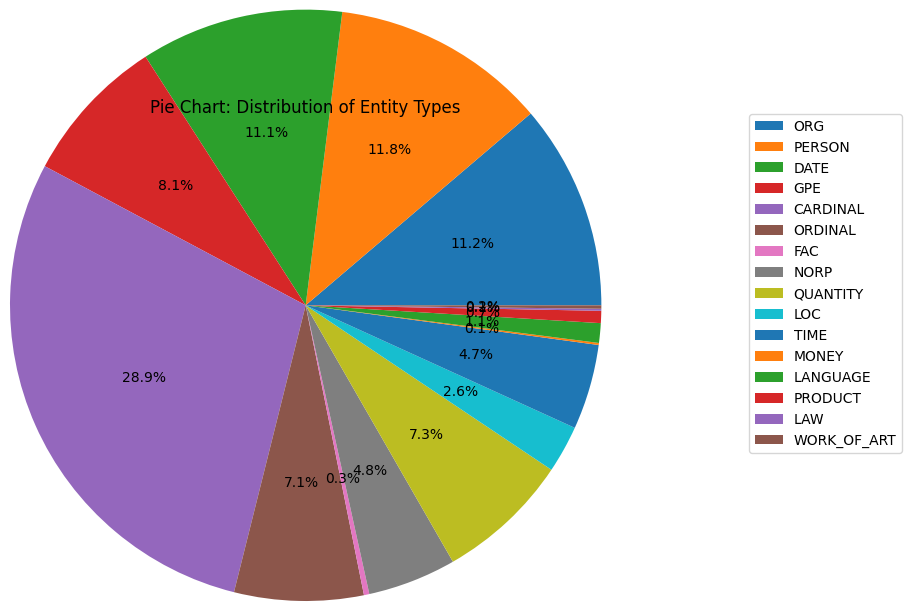

In [ ]:
import matplotlib.patches as mpatches
from sklearn.metrics import f1_score

# Manually labeled entities and types from 15 different pages of the book for evaluation
manual_labels = {
     'PERSON': ['Glumdalclitch','Yahoos','Gulliver' , 'James' , 'Mary' , 'Edmund' , 'Abraham' , 'John'],
    'ORG': ['court', 'empire', 'provinve', 'council', 'ministry', 'embassy', 'kingdom', 'servants' , 'jewry' , 'college' , 'university'],
    'GPE': ["Great Britain", "London", "St. Alban's", 'Blefuscu', 'Lilliput','England', 'earth','Barbadoes and Leeward Island','South Sea',' Madagascar','Nottinghamshire','Leyden','Levant'],
    'LOC': ['shore', 'world','island', 'country', 'sea', 'nations', 'prison', 'world','Uncharted waters'],
    'PRODUCT': ["purse","gold","pistoles","coins","water-mill","handkerchief","coat","straw","walking-staff","hat","bed","quilt","table","stool","pumpkin",
                'half-moon', 'breast', 'water', 'channel', 'cable', 'fleet', 'ports', 'train','Ship’s goods','Victuals','drink','Chain','ship',
                'trees', 'fruit', 'grain', 'food', 'rock', 'money', 'animals', 'meats', 'head', 'vessels', 'liquors', 'sauces', 'cup', 'tracts' , 'house'],
    'EVENT': ['Calentures','Recruiting', 'mutiny','Trading','Journey','Threats of murder','Confinement'],
    'WORK_OF_ART': ['nardac'],
    'LAW': ['Oath of submission','Pirate code','Apprenticeship agreement'],
    'LANGUAGE': ['Spanish'],
    'DATE': ['days', 'annual','years'],
    'TIME': ['nine hours','four hours',' ten minutes','three minutes','few moment'],
    'MONEY': ['pounds'],
    'QUANTITY': ["two yards", "a foot", "forty feet", 'middle', 'shallower', 'little', 'less'],
    'ORDINAL': ['first', 'second','third'],
    'CARDINAL': ["two", "four", "twenty", "thirty", "twelve", "forty", 'Fifty','six', 'five','hundred','three', 'one'],
}

# Initialize lists to store results for each iteration
all_f1_scores_entities = []
all_f1_scores_types = []

# Repeating the evaluation three times
for _ in range(3):
    spy = spacy.load("en_core_web_sm")
    doc = spy(copy_pdf_text)
    predicted_entities = [ent.text for ent in doc.ents]
    predicted_types = [ent.label_ for ent in doc.ents]

    predicted_entities_set = set(predicted_entities)
    predicted_types_set = set(predicted_types)

    tp_entities, fp_entities, fn_entities = 0, 0, 0
    tp_types, fp_types, fn_types = 0, 0, 0

    # Loop through each entity type in the manual_labels
    for entity_type, manual_entities in manual_labels.items():
        tp_entities += len(set(manual_entities) & predicted_entities_set)
        fp_entities += len(set(predicted_entities) - set(manual_entities))
        fn_entities += len(set(manual_entities) - set(predicted_entities))

        if entity_type in predicted_types_set:
            if entity_type in manual_labels and len(manual_labels[entity_type]) > 0:
                tp_types += 1
            else:
                fp_types += 1
        elif entity_type in manual_labels and len(manual_labels[entity_type]) > 0:
            fn_types += 1

    precision_entities = tp_entities / (tp_entities + fp_entities)
    recall_entities = tp_entities / (tp_entities + fn_entities)
    f1_score_entities = 2 * (precision_entities * recall_entities) / (precision_entities + recall_entities)
    all_f1_scores_entities.append(f1_score_entities)

    precision_types = tp_types / (tp_types + fp_types)
    recall_types = tp_types / (tp_types + fn_types)
    f1_score_types = 2 * (precision_types * recall_types) / (precision_types + recall_types)
    all_f1_scores_types.append(f1_score_types)

# Print the F1 scores for each iteration
for i, (f1_entities, f1_types) in enumerate(zip(all_f1_scores_entities, all_f1_scores_types), 1):
    print(f"Iteration {i}: F1 Score for Types: {f1_types}")
    entity_counts = {}
    for ent in doc.ents:
        entity_counts[ent.label_] = entity_counts.get(ent.label_, 0) + 1
    print()
    fig, ax1 = plt.subplots(figsize=(15, 7))
    ax1.bar(entity_counts.keys(), entity_counts.values(), color='skyblue')
    ax1.set_xlabel('Entity Types')
    ax1.set_ylabel('Count')
    ax1.set_title('Bar Graph: Distribution of Entity Types')
    plt.tight_layout()
    plt.show()
    print()
    fig, ax2 = plt.subplots()
    ax2.pie(entity_counts.values(), autopct='%1.1f%%', startangle=0, radius = 2)
    ax2.set_title('Pie Chart: Distribution of Entity Types')
    plt.legend(labels=entity_counts.keys(), loc = (1.7,.1))
    plt.show()
    print()



In [ ]:
entity_counts = {}
for ent in doc.ents:
    entity_counts[ent.label_] = entity_counts.get(ent.label_, 0) + 1

In [ ]:
# Checking what comes in which tag(code block should not be consider)
for ent in doc.ents:
    if ent.label_ == "ORG":
        print(ent.text)

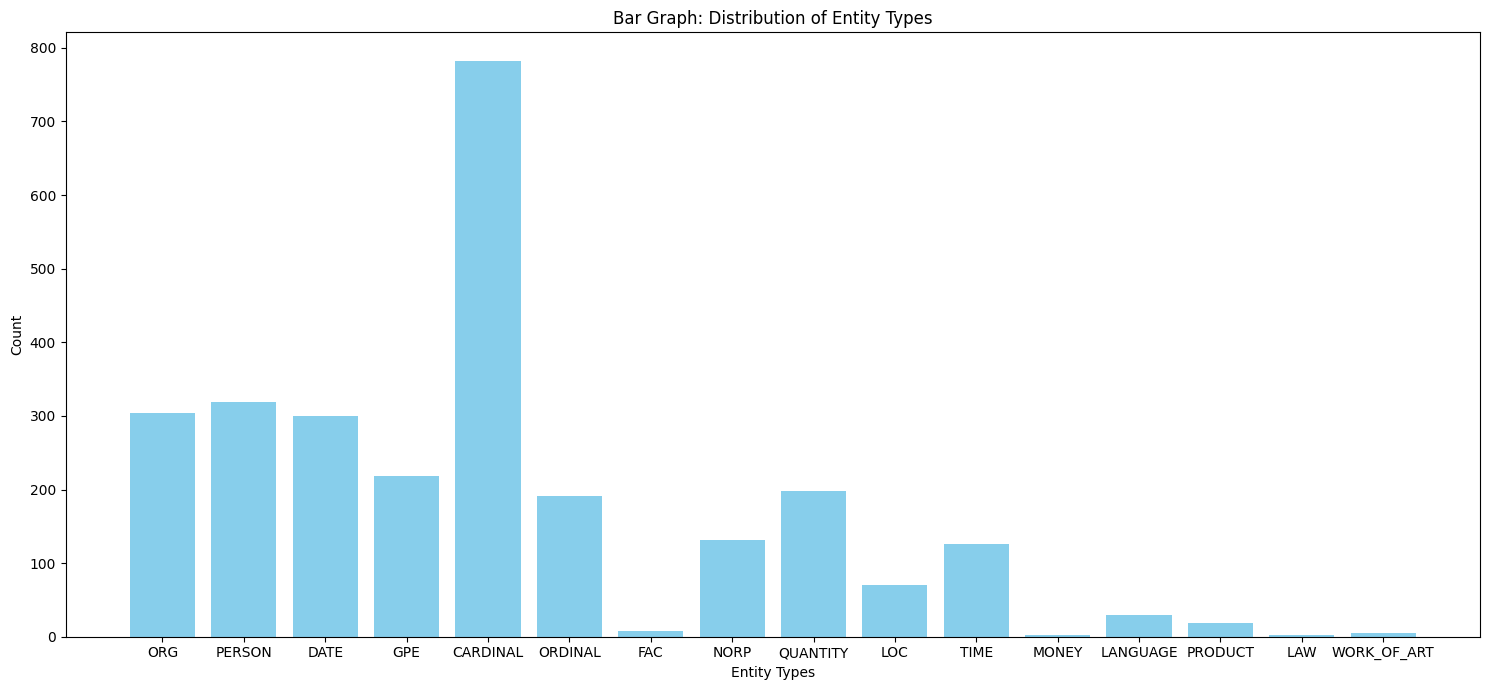

In [ ]:
fig, ax1 = plt.subplots(figsize=(15, 7))
ax1.bar(entity_counts.keys(), entity_counts.values(), color='skyblue')
ax1.set_xlabel('Entity Types')
ax1.set_ylabel('Count')
ax1.set_title('Bar Graph: Distribution of Entity Types')
plt.tight_layout()
plt.show()

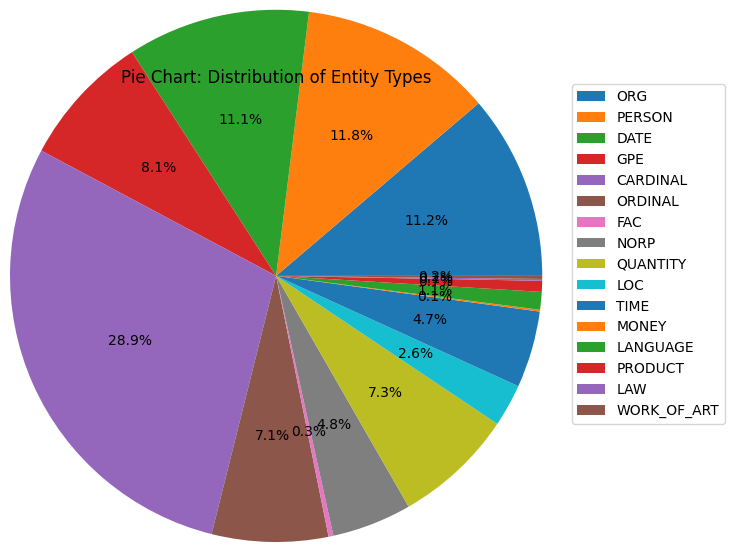

In [ ]:
fig, ax2 = plt.subplots()
ax2.pie(entity_counts.values(), autopct='%1.1f%%', startangle=0, radius = 1.8)
ax2.set_title('Pie Chart: Distribution of Entity Types')
# plt.subplots_adjust(left=0.1, right=0.9, top=.9, bottom=0.1)
# plt.tight_layout()
plt.legend(labels=entity_counts.keys(), loc = (1.3,.1))
plt.show()

## **iii)TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import pairwise_distances

In [ ]:
chapter_pattern = r"Chapter [IVXLCDM]+"
chapters = re.findall(f"{chapter_pattern}.*?(?={chapter_pattern}|$)", pdf_text, re.DOTALL)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


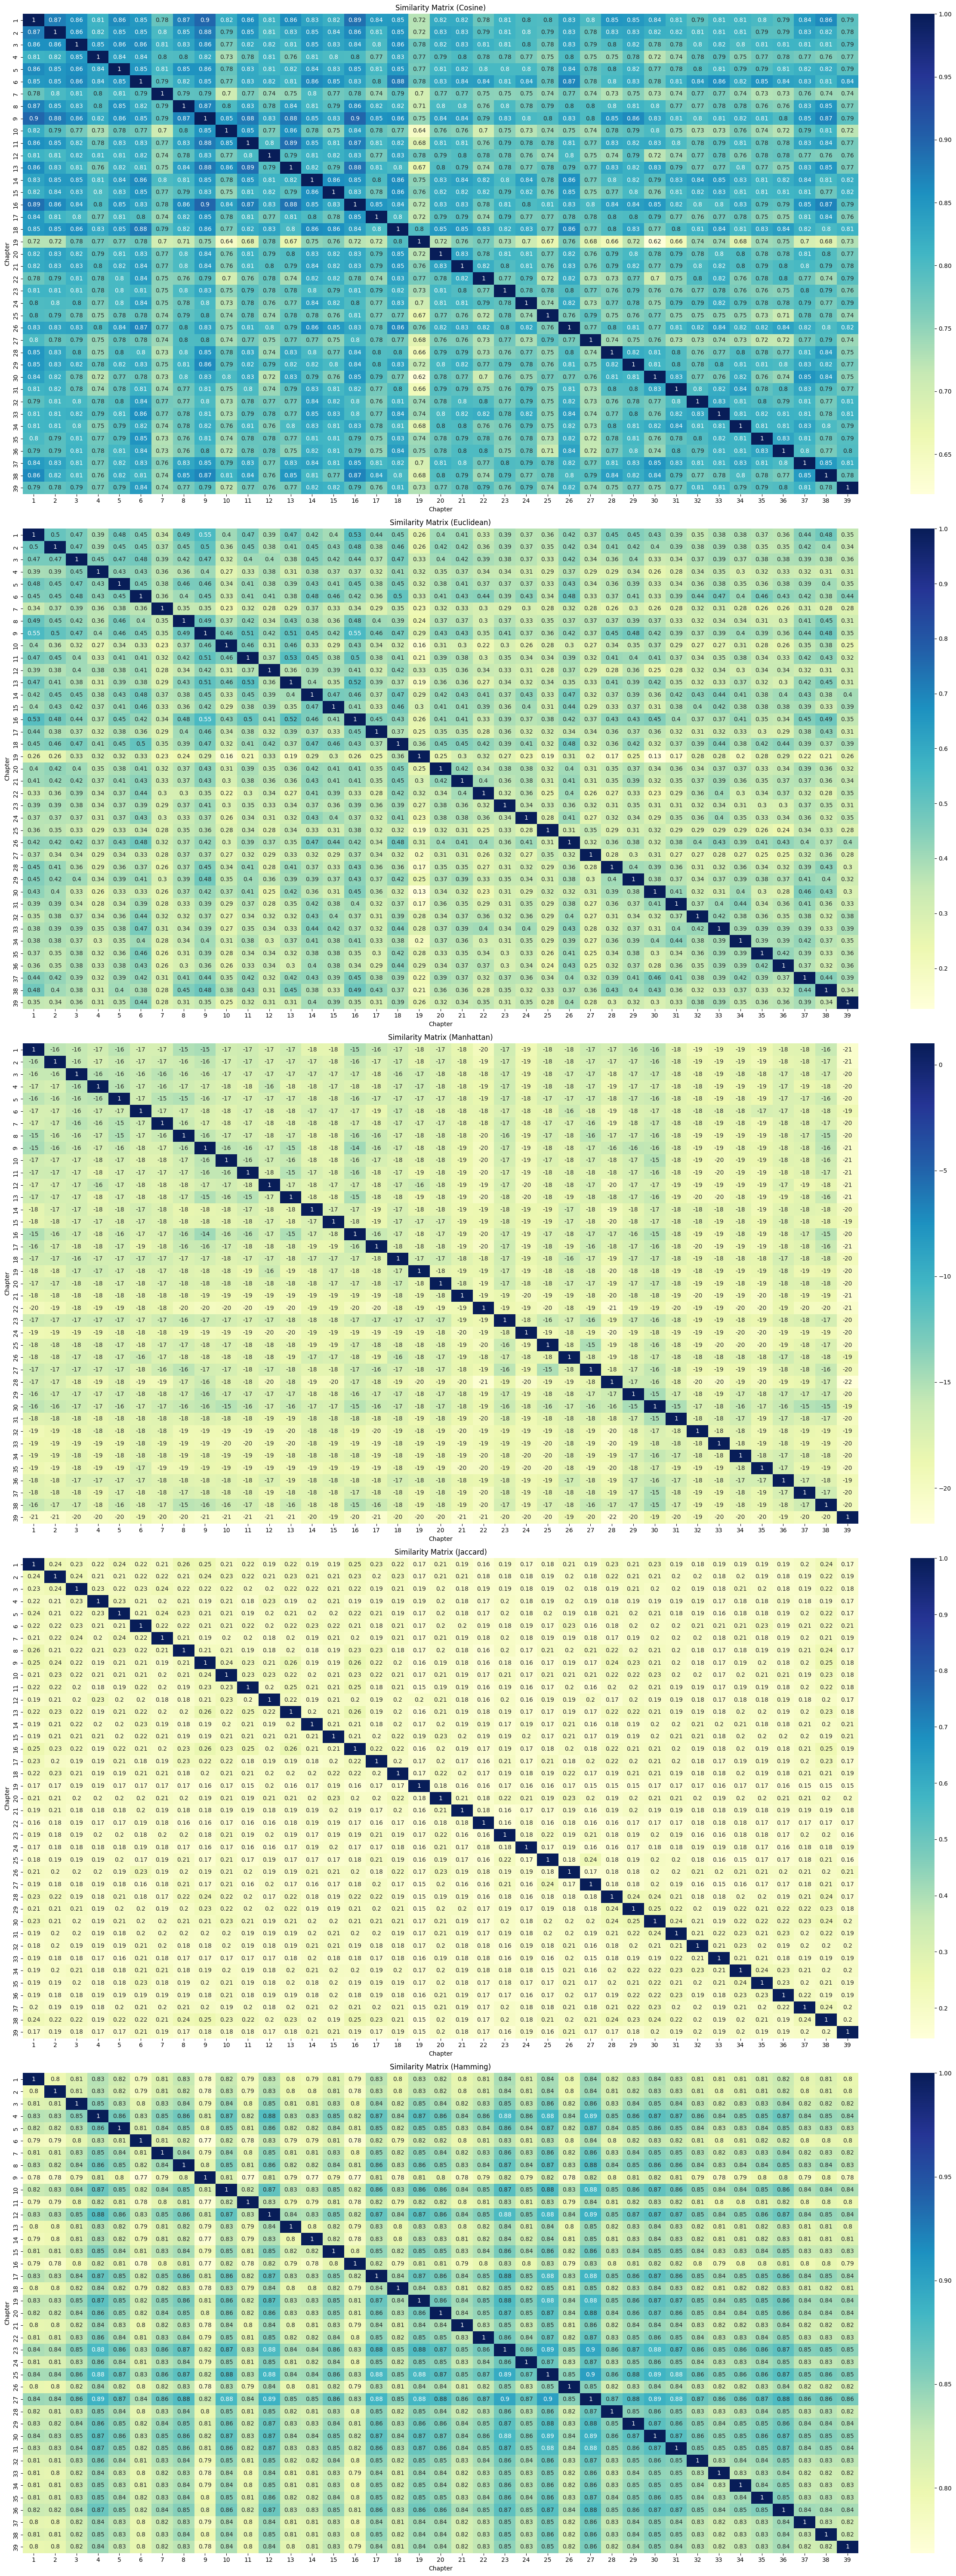

In [ ]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(chapters)

dense_tfidf_matrix = tfidf_matrix.toarray()  #TypeError: scipy distance metrics do not support sparse matrices. so converted to dense vector

similarity_measures = ['cosine', 'euclidean', 'manhattan', 'jaccard', 'hamming'] #5 types of simmilarity measure taken into considertion

plt.figure(figsize=(25, 60))

for idx, metric in enumerate(similarity_measures, start=1):
    similarity_matrix = 1 - pairwise_distances(dense_tfidf_matrix, metric=metric)
    plt.subplot(5, 1, idx)
    sns.heatmap(similarity_matrix, annot=True, cmap="YlGnBu", xticklabels=range(1, len(chapters) + 1), yticklabels=range(1, len(chapters) + 1))
    plt.title(f"Similarity Matrix ({metric.capitalize()})")
    plt.xlabel("Chapter")
    plt.ylabel("Chapter")

plt.tight_layout()
plt.show()